# **Project Idea**

The data consulting firm Automatidata, the NYC Taxi and Limousine Commission (New York City TLC), wants to build a multiple linear regression model to predict taxi fares using existing data that was collected over a period of time in 2017

# Build a Multiple Linear Regression Model

-> In this project, a multiple linear regression model is built to estimate the linear relationship between one continuous dependent variable (fare_amount) and two or more independent variables and evaluate the model.

-> This project has three parts:
- **Part 1:** EDA & Checking Model Assumptions
- **Part 2:** Model Building and Evaluation
- **Part 3:** Interpreting Model Results

### Task 1. Imports and Loading

In [1]:
# Import packages for numerics + dataframes
import pandas as pd
import numpy as np

# Import packages for visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for date conversions for calculating trip durations
from datetime import datetime
from datetime import date
from datetime import timedelta

# Import packages for OLS, MLR, confusion matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics # For confusion matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [2]:
# Load the dataset
# Note: index_col parameter specified can be used to avoid "Unnamed: 0" column when reading in data from csv
data = pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv") 

### Task 2a. Explore Data with EDA
    Analyze and discover data, looking for correlations, missing data, outliers, and duplicates.

In [3]:
# Keep `data` as the original dataframe and create a copy (df) where changes will go
df = data.copy()

# Display the dataset's shape
print(df.shape)

# Display basic info about the dataset
df.info()

(22699, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  flo

In [4]:
# Check for duplicates using .drop_duplicates()
print('Shape of dataframe:', df.shape)
print('Shape of dataframe with duplicates dropped:', df.drop_duplicates().shape)

# Check for missing values in dataframe using .isna()
print('Missing values per column:')
print(df.isna().sum())
print('Total count of missing values:', df.isna().sum().sum())

Shape of dataframe: (22699, 18)
Shape of dataframe with duplicates dropped: (22699, 18)
Missing values per column:
Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64
Total count of missing values: 0


In [5]:
# Display descriptive stats about the data
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


**Insights** some values stand out from this table of summary statistics: 
    -> For instance, there are clearly some outliers in several variables, like `tip_amount` `$200` and `total_amount` `$1200` 
    -> Also, a number of the variables, such as `mta_tax`, seem to be almost constant throughout the data, which would imply          that they would not be expected to be very predictive.

### Task 2b. Check datatypes of Pickup & Dropoff Columns and Convert  Them to Datetime If Needed

In [6]:
# Check the format of the data
df['tpep_dropoff_datetime'][0]     # [0] refers to the value at the row 0 (a sample to check)

'03/25/2017 9:09:47 AM'

In [26]:
# Check the datatypes of `tpep_pickup_datetime`, `tpep_dropoff_datetime`
print('Data type of tpep_pickup_datetime:', df['tpep_pickup_datetime'].dtype)
print('Data type of tpep_dropoff_datetime:', df['tpep_dropoff_datetime'].dtype)

Data type of tpep_pickup_datetime: object
Data type of tpep_dropoff_datetime: object


In [27]:
# Convert `tpep_pickup_datetime` to datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], format='%m/%d/%Y %I:%M:%S %p')

# Convert `tpep_dropoff_datetime` to datetime format
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], format='%m/%d/%Y %I:%M:%S %p')

# Check data types of `tpep_pickup_datetime` and `tpep_dropoff_datetime` after conversion
print('Data type of tpep_pickup_datetime:', df['tpep_pickup_datetime'].dtype)
print('Data type of tpep_dropoff_datetime:', df['tpep_dropoff_datetime'].dtype)

Data type of tpep_pickup_datetime: datetime64[ns]
Data type of tpep_dropoff_datetime: datetime64[ns]


### Task 2c. Create Duration Column
    Create a new column called `duration` that represents the total number of minutes that each taxi ride took.

In [28]:
# Create `duration` column
df['duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']) / np.timedelta64(1,'m')

### Task 2d. Check for Outliers

In [29]:
# Call `df.info()` to inspect the columns and decide which ones to check for outliers.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

-> Some of the features will not be used to fit your model.
-> The most important columns to check for outliers are likely to be:
    `trip_distance`
    `fare_amount`
    `duration`

### Task 2e. Plot a Box plot
    Plot a box plot for each feature: `trip_distance`, `fare_amount`, `duration` to investigate outliers

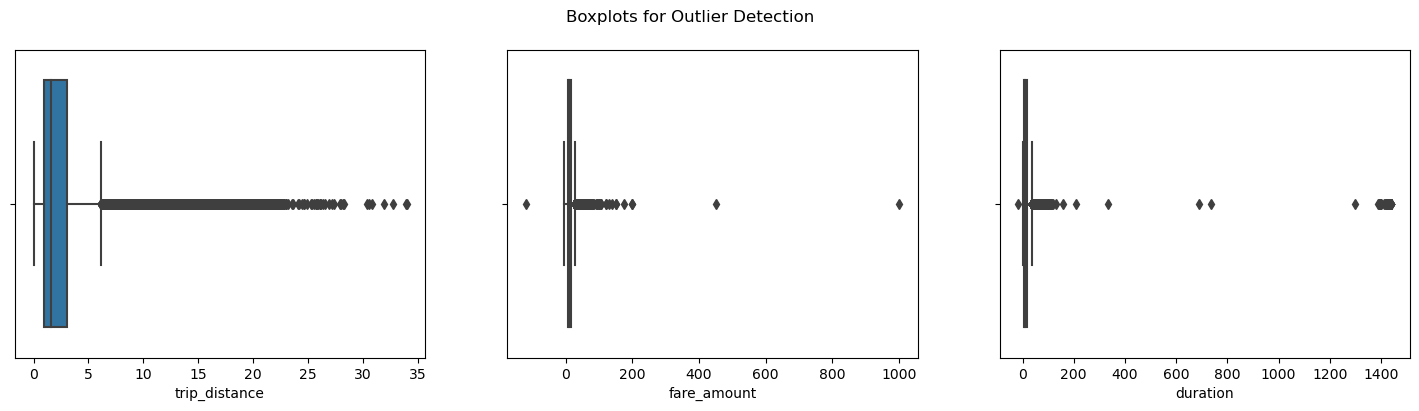

In [30]:
# Create a figure with three subplots for each feature
fig, axes = plt.subplots(1, 3, figsize=(18, 4))
fig.suptitle('Boxplots for Outlier Detection')
sns.boxplot(ax=axes[0], x=df['trip_distance'])
sns.boxplot(ax=axes[1], x=df['fare_amount'])
sns.boxplot(ax=axes[2], x=df['duration'])
plt.show()

**Insights**

    -> All three variables contain outliers. Some are extreme, but others not so much.
    -> It's 30 miles from the southern tip of Staten Island to the northern end of Manhattan and that's in a straight line.            It's reasonable to leave these values alone and not alter them. 
    -> However, the values for `fare_amount` and `duration` definitely seem to have problematic outliers on the higher end.

### Task 2f. Outliers Imputations

#### `trip_distance` outliers
    From the summary statistics and Box plots, it can be seen that there are trip distances of 0. Are these reflective of           erroneous data, or are they very short trips that get rounded down? How many of rides where trip_distance = 0?

In [32]:
# To check trip distances, do
#     1. Sort the column values using sorted()
#     2. Eliminate duplicates using set()
#     3. Inspect the least 10 values and see whether they are rounded down values (yielding 0) or precise values

sorted(set(df['trip_distance']))[:10]

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]

**Insights**
    -> The distances are captured with a high degree of precision, so it is unlikely trip distances were rounded down.
    -> However, it might be possible for trips to have distances of zero if a passenger summoned a taxi and then changed their        mind.

In [34]:
# Calculate the count of rides where the `trip_distance` is zero.
sum(df['trip_distance'] == 0)

148

**Insight** 
    -> 148 out of ~23,000 rides is relatively insignificant. Those could be imputed with a value of 0.01, but it's unlikely to        have much of an effect on the model. Therefore, the `trip_distance` column will remain untouched with regard to                outliers.

#### `fare_amount` outliers

In [13]:
# Display descriptive stats about the 'fare_amount' feature
df['fare_amount'].describe()

count    22699.000000
mean        13.026629
std         13.243791
min       -120.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

**Insight**

    -> The range of values in the `fare_amount` column is large and the extremes don't make much sense.
        -> Negative values are problematic.
        -> The maximum fare amount in this dataset is nearly 1000 dollars, which seems very unlikely. High values for this feature can be capped based on intuition and statistics. 
            -> The interquartile range (IQR) formula `Q3 - Q1` yields 8 dollars.
            -> The standard formula of upper threshold `Q3 + (1.5 * IQR)` yields 26.50 dollars. That doesn't seem appropriate for the maximum fare cap. In this case, we'll use a factor of `6`, which results in a cap of 62.50 dollars.

In [35]:
def outlier_imputer(column_list, iqr_factor):
    '''
    Impute upper-limit values in specified columns based on their interquartile range.

    Arguments:
        column_list: A list of columns to iterate over
        iqr_factor: A number representing x in the formula 'Q3 + (x * IQR)' 
                    Used to determine maximum threshold, beyond which a point is considered an outlier.

    The IQR is computed for each column in column_list and values exceeding
    the upper threshold for each column are imputed with the upper threshold value.
    '''
    for col in column_list:
        # Impute values less than $0 with `0`
        df.loc[df[col] < 0, col] = 0

        # Calculate upper threshold
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_threshold = q3 + (iqr_factor * iqr)
        print(col)
        print('Q3:', q3)
        print('upper_threshold:', upper_threshold)

        # Impute values larger than upper_threshold with upper_threshold
        df.loc[df[col] > upper_threshold, col] = upper_threshold
        print(df[col].describe())

In [36]:
outlier_imputer(['fare_amount'], 6)

fare_amount
Q3: 14.5
upper_threshold: 62.5
count    22699.000000
mean        12.897913
std         10.541137
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max         62.500000
Name: fare_amount, dtype: float64


#### `duration` outliers

In [17]:
# Display descriptive stats about the 'duration' feature
df['duration'].describe()

count    22699.000000
mean        17.013777
std         61.996482
min        -16.983333
25%          6.650000
50%         11.183333
75%         18.383333
max       1439.550000
Name: duration, dtype: float64

**Insight**

    -> The `duration` column has problematic values at both the lower and upper extremities.
        -> There should be no values that represent negative time. Impute all negative durations with `0`.
        -> Impute high values the same way imputed the high-end outliers for fares: `Q3 + (6 * IQR)`.

In [38]:
# Impute the high outliers
outlier_imputer(['duration'], 6)

duration
Q3: 18.383333333333333
upper_threshold: 88.78333333333333
count    22699.000000
mean        14.460555
std         11.947043
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max         88.783333
Name: duration, dtype: float64


### Task 3a. Feature Engineering

#### Create `mean_distance` column
In this step, create a column called `mean_distance` that captures the mean distance for each group of trips that share pickup and dropoff points.
    
To do this, create a helper column called `pickup_dropoff`, which contains the unique combination of pickup and dropoff location IDs for each row. One way to do this is to convert the pickup and dropoff location IDs to strings and join them, separated by a space. The space is to ensure that, for example, a trip with pickup/dropoff points of 12 & 151 gets encoded differently than a trip with points 121 & 51.

In [39]:
# Create `pickup_dropoff` column
df['pickup_dropoff'] = df['PULocationID'].astype('string') + ' ' + df['DOLocationID'].astype('string')
df['pickup_dropoff'].head()

0    100 231
1     186 43
2    262 236
3     188 97
4      4 112
Name: pickup_dropoff, dtype: string

    Now, use a `groupby()` statement to group each row by the new `pickup_dropoff` column, compute the mean, and capture the       values only in the `trip_distance` column. Then assign the results to a variable named `grouped`.

In [40]:
grouped = df.groupby('pickup_dropoff').mean(numeric_only=True)[['trip_distance']]
grouped[:5]

,trip_distance
pickup_dropoff,
1 1,2.433333
10 148,15.700000
100 1,16.890000
100 100,0.253333
100 107,1.180000


`grouped` is an object of the `DataFrame` class
    -> Convert it to a dictionary using the `to_dict()` method. Assign the results to a variable called `grouped_dict`. This          will result in a dictionary with a key of `trip_distance` whose values are another dictionary. The inner dictionary's          keys are pickup/dropoff points and its values are mean distances. This is the information you want.

        grouped_dict = {'trip_distance': {'A B': 1.25, 'C D': 2, 'D C': 3}

    -> Reassign the `grouped_dict` dictionary so it contains only the inner dictionary. In other words, get rid of                    `trip_distance` as a key, so:

        grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}

In [42]:
# Convert `grouped` to a dictionary
grouped_dict = grouped.to_dict()

# Reassign to only contain the inner dictionary
grouped_dict = grouped_dict['trip_distance']

Now, create a `mean_distance` column that is a copy of the `pickup_dropoff` helper column.
Use the `map()`method on the `mean_distance` series. Pass `grouped_dict` as its argument. Reassign the result back to the `mean_distance` series.

Note: When passing a dictionary to the `Series.map()` method, it will replace the data in the series where that data matches the dictionary's keys. The values that get imputed are the values of the dictionary.

                                        df['mean_distance']

                                           |mean_distance |
                                           |    'A B'     |
                                           |    'C D'     |
                                           |    'A B'     |
                                           |    'D C'     |
                                           |    'E F'     |

                                        grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}

                                        df['mean_distance`] = df['mean_distance'].map(grouped_dict)
                                        
                                        df['mean_distance']
                                           |mean_distance |
                                           |    1.25      |
                                           |    2         |
                                           |    1.25      |
                                           |    3         |
                                           |    NaN       |

In [43]:
# Create a mean_distance column that is a copy of the pickup_dropoff helper column
df['mean_distance'] = df['pickup_dropoff']

# Map `grouped_dict` to the `mean_distance` column
df['mean_distance'] = df['mean_distance'].map(grouped_dict)

# Confirm that it worked
df[(df['PULocationID']==100) & (df['DOLocationID']==231)][['mean_distance']]

,mean_distance
0,3.521667
4909,3.521667
16636,3.521667
18134,3.521667
19761,3.521667
20581,3.521667


#### Create `mean_duration` column

In [44]:
grouped = df.groupby('pickup_dropoff').mean(numeric_only=True)[['duration']]
grouped

# Create a dictionary where keys are unique pickup_dropoffs and values are mean trip duration for all trips with those pickup_dropoff combos
grouped_dict = grouped.to_dict()
grouped_dict = grouped_dict['duration']

df['mean_duration'] = df['pickup_dropoff']
df['mean_duration'] = df['mean_duration'].map(grouped_dict)

# Confirm that it worked
df[(df['PULocationID']==100) & (df['DOLocationID']==231)][['mean_duration']]

,mean_duration
0,22.847222
4909,22.847222
16636,22.847222
18134,22.847222
19761,22.847222
20581,22.847222


#### Create `day` and `month` columns

In [45]:
# Create 'day' column
df['day'] = df['tpep_pickup_datetime'].dt.day_name().str.lower()

# Create 'month' column
df['month'] = df['tpep_pickup_datetime'].dt.strftime('%b').str.lower()

#### Create `rush_hour` column
    Define rush hour as:
    -> Any weekday (not Saturday or Sunday) AND
    -> Either from 06:00 to 10:00 or from 16:00 to 20:00

In [46]:
# Create 'rush_hour' column
df['rush_hour'] = df['tpep_pickup_datetime'].dt.hour

# If day is Saturday or Sunday, impute 0 in `rush_hour` column as an indicator
df.loc[df['day'].isin(['saturday', 'sunday']), 'rush_hour'] = 0

In [47]:
# For weekdays (MON-THU), imput 1 in the 'rush_hout' if the ride was during rush hour and a 0 if it was not.
def rush_hourizer(hour):
    if 6 <= hour['rush_hour'] < 10:
        val = 1
    elif 16 <= hour['rush_hour'] < 20:
        val = 1
    else:
        val = 0
    return val

In [48]:
# Apply the `rush_hourizer()` function to the new column
df['rush_hour'] = df.apply(rush_hourizer, axis=1)
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.0,0.3,16.56,14.066667,100 231,3.521667,22.847222,saturday,mar,0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,0.0,0.3,20.80,26.500000,186 43,3.108889,24.470370,tuesday,apr,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,0.0,0.3,8.75,7.200000,262 236,0.881429,7.250000,friday,dec,1
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,0.0,0.3,27.69,30.250000,188 97,3.700000,30.250000,sunday,may,0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.0,0.3,17.80,16.716667,4 112,4.435000,14.616667,saturday,apr,0


### Task 4. Scatter plot

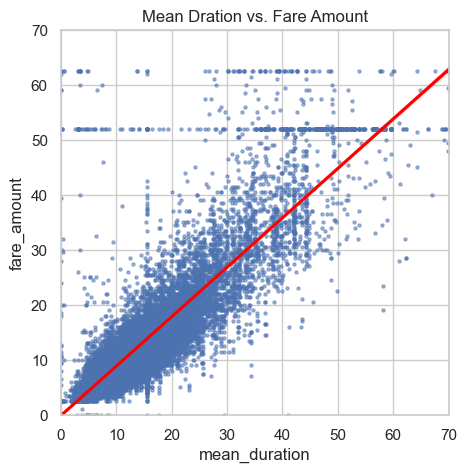

In [49]:
# Create a scatter plot of duration and trip_distance, with a line of best fit
sns.set(style='whitegrid')
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(5)
sns.regplot(x=df['mean_duration'], y=df['fare_amount'],
            scatter_kws={'alpha':0.5, 's':5},
            line_kws={'color':'red'}
           )
plt.ylim(0, 70)
plt.xlim(0, 70)
plt.title('Mean Dration vs. Fare Amount')
plt.show()

**Insight**

-> The `mean_duration` feature correlates with the target variable. 
-> The first horizontal line around fare amount 62.50 dollars is the maximum that was imputed for outliers, so all former outliers will now have fare amounts of 62.50 dollars. 
-> The second horizontal line around fare amount of 52 dollars needs to be invertigated......

In [51]:
# Find number of trips whose fares above $50
df[df['fare_amount'] > 50]['fare_amount'].value_counts().head()

52.0    514
62.5     84
59.0      9
50.5      9
57.5      8
Name: fare_amount, dtype: int64

**Insight** There are 514 trips whose fares were 52.

In [54]:
# Examine the first 50 of these trips as a sample
df[df['fare_amount'] == 52].head(50)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
11,18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,18.90,2,N,236,132,...,5.54,0.3,72.92,36.800000,236 132,19.211667,40.500000,sunday,mar,0
110,47959795,1,2017-06-03 14:24:57,2017-06-03 15:31:48,1,18.00,2,N,132,163,...,0.00,0.3,52.80,66.850000,132 163,19.229000,52.941667,saturday,jun,0
161,95729204,2,2017-11-11 20:16:16,2017-11-11 20:17:14,1,0.23,2,N,132,132,...,0.00,0.3,52.80,0.966667,132 132,2.255862,3.021839,saturday,nov,0
247,103404868,2,2017-12-06 23:37:08,2017-12-07 00:06:19,1,18.93,2,N,132,79,...,0.00,0.3,52.80,29.183333,132 79,19.431667,47.275000,wednesday,dec,0
379,80479432,2,2017-09-24 23:45:45,2017-09-25 00:15:14,1,17.99,2,N,132,234,...,5.76,0.3,73.20,29.483333,132 234,17.654000,49.833333,sunday,sep,0
388,16226157,1,2017-02-28 18:30:05,2017-02-28 19:09:55,1,18.40,2,N,132,48,...,5.54,0.3,62.84,39.833333,132 48,18.761905,58.246032,tuesday,feb,1
406,55253442,2,2017-06-05 12:51:58,2017-06-05 13:07:35,1,4.73,2,N,228,88,...,5.76,0.3,58.56,15.616667,228 88,4.730000,15.616667,monday,jun,0
449,65900029,2,2017-08-03 22:47:14,2017-08-03 23:32:41,2,18.21,2,N,132,48,...,5.76,0.3,58.56,45.450000,132 48,18.761905,58.246032,thursday,aug,0
468,80904240,2,2017-09-26 13:48:26,2017-09-26 14:31:17,1,17.27,2,N,186,132,...,5.76,0.3,58.56,42.850000,186 132,17.096000,42.920000,tuesday,sep,0
520,33706214,2,2017-04-23 21:34:48,2017-04-23 22:46:23,6,18.34,2,N,132,148,...,0.00,0.3,57.80,71.583333,132 148,17.994286,46.340476,sunday,apr,0


**Insight**

    -> Almost all of the trips in the first 50 rows where the fare amount was $52 either begin or end at location 132, and all        of them have a `RatecodeID` of 2.
    
    -> There is no clear reason why PULocation 132 should have so many fares of 52 dollars. However, there are many toll              amounts of $5.76 and $5.54. This would seem to indicate that location 132 is in an area that frequently requires tolls          to get to and from. It's likely this is an airport.

    -> The data dictionary says that `RatecodeID` of 2 indicates trips for JFK Airport. A quick Google search for 'new york            city taxi flat rate '$52'' indicates that in 2017 (the year that this data was collected) there was indeed a flat fare          for taxi trips between JFK airport (in Queens) and Manhattan.

### Task 5. Isolate Modeling Variables
    Drop features that are redundant, irrelevant, or that will not be available in a deployed environment.

In [55]:
df2 = df.drop(['Unnamed: 0', 'tpep_dropoff_datetime', 'tpep_pickup_datetime',
               'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
               'payment_type', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
               'total_amount', 'tpep_dropoff_datetime', 'tpep_pickup_datetime', 'duration',
               'pickup_dropoff', 'day', 'month'
               ], axis=1)

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   rush_hour        22699 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.0 MB


### Task 6. Pairwise Relationships Visualization
    Plot the pairwise relationships between `fare_amount`, `mean_duration`, and `mean_distance`.

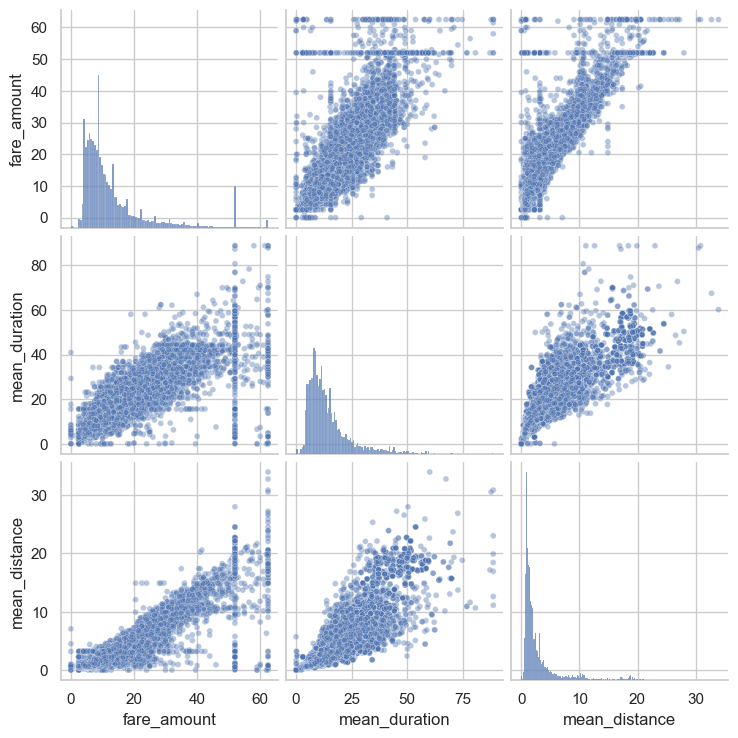

In [56]:
# Create a pairplot to visualize pairwise relationships between variables in the data
sns.pairplot(df2[['fare_amount', 'mean_duration', 'mean_distance']], plot_kws={'alpha':0.4, 'size':5})

**Insight: ** These variables all show linear correlation with each other.

### Task 7. Identify Correlations

In [36]:
# Create correlation matrix containing pairwise correlation of columns, using pearson correlation coefficient
df2.corr(method='pearson')

,VendorID,passenger_count,fare_amount,mean_distance,mean_duration,rush_hour
VendorID,1.000000,0.266463,0.001045,0.004741,0.001876,-0.002874
passenger_count,0.266463,1.000000,0.014942,0.013428,0.015852,-0.022035
fare_amount,0.001045,0.014942,1.000000,0.910185,0.859105,-0.020075
mean_distance,0.004741,0.013428,0.910185,1.000000,0.874864,-0.039725
mean_duration,0.001876,0.015852,0.859105,0.874864,1.000000,-0.021583
rush_hour,-0.002874,-0.022035,-0.020075,-0.039725,-0.021583,1.000000


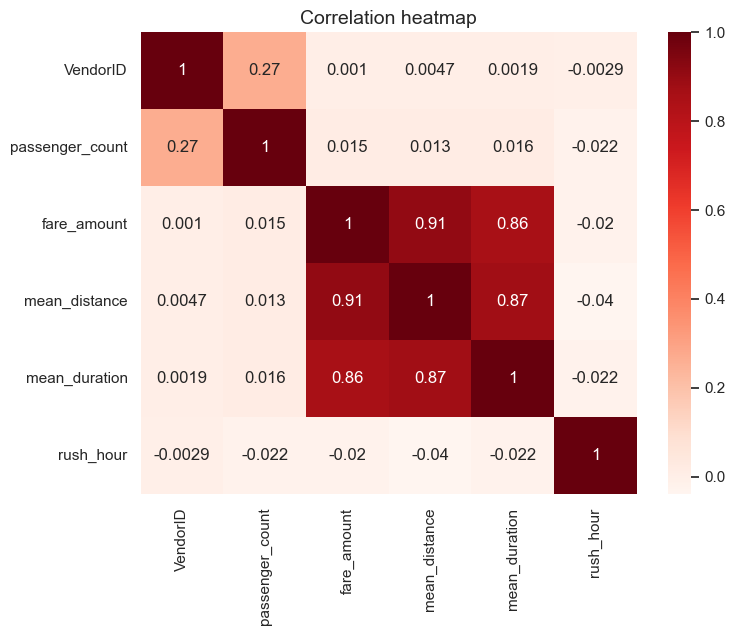

In [59]:
# Create correlation heatmap and plug df2.corr() in as a parameter
plt.figure(figsize=(8,6))
sns.heatmap(df2.corr(method='pearson'), annot=True, cmap='Reds')
plt.title('Correlation heatmap', fontsize=14)
plt.show()

**Insight** 

-> Features `mean_duration` and `mean_distance` are both highly correlated with the target variable of `fare_amount`. However, `mean_duration` and `mean_distance` are also both correlated with each other, with a Pearson correlation of 0.87, which could be a problem when building linear regression models. 
-> Note: correlated predictor variables can still be used to create an accurate predictor if the prediction itself is more important than using the model as a tool to learn about data.
-> This model will predict `fare_amount`. Therefore, both variables even though they are correlated will be used.

### Task 8a. Split Data Into Outcome and Predictor Features

In [64]:
# Remove the target column from the features
X = df2.drop(columns=['fare_amount'])

# Set y variable
y = df2[['fare_amount']]

### Task 8b. Pre-process the Data

#### Task 8b.1 Encode Categorical Variables

In [65]:
# Convert VendorID to string
X['VendorID'] = X['VendorID'].astype('string')

# Get dummies to encode categorical features
X = pd.get_dummies(X, drop_first=True)

#### Task 8b.2 Normalize the Data

In [66]:
# Standardize the X variables using Use `StandardScaler()` and `fit_transform()`
scaler = StandardScaler()               # Create an object of StandardScaler() called scaler
X_scaled = scaler.fit_transform(X)      # Call the method 'fit_transform' in the class StandardScaler() with X as parameter
print('X scaled:', X_scaled)

X scaled: [[ 0.8931955   3.39065627  0.17093801  0.83195364 -0.64959666]
 [-1.11957573 -0.4997803   0.05495383  0.99296921 -0.64959666]
 [-1.11957573 -0.4997803  -0.57092814 -0.7152838   1.53941679]
 ...
 [ 0.8931955  -0.4997803  -0.62633441 -0.77886169 -0.64959666]
 [ 0.8931955  -0.4997803  -0.23485053  0.21719198 -0.64959666]
 [-1.11957573 -0.4997803  -0.40359028 -0.50145366 -0.64959666]]


#### Split Data Into Training and Test Sets

In [67]:
# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

In [69]:
# Fit the model to the training data
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

### Task 8c. Evaluate Model on Both Training and Test Data
    -> Evaluate the model performance by calculating:
        -> The residual sum of squares and the explained variance score (R^2)
        -> The Mean Absolute Error (MAE)
        -> The Mean Squared Error (MSE)
        -> The Root Mean Squared Error (RMSE)

In [71]:
# Evaluate the model performance on the training data
print('Coefficient of determination:', lr_model.score(X_train, y_train))

y_pred_train = lr_model.predict(X_train)
print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:', np.sqrt(mean_squared_error(y_train, y_pred_train)))

Coefficient of determination: 0.8398434585044773
R^2: 0.8398434585044773
MAE: 2.186666416775413
MSE: 17.88973296349268
RMSE: 4.229625629236313


In [72]:
# Evaluate the model performance on the testing data
print('Coefficient of determination:', lr_model.score(X_test, y_test))

y_pred_test = lr_model.predict(X_test)
print('R^2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test,y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_test)))

Coefficient of determination: 0.8682583641795454
R^2: 0.8682583641795454
MAE: 2.1336549840593864
MSE: 14.326454156998942
RMSE: 3.7850302716093225


**Insight** 

-> The model performance is high on both training and test sets, suggesting that there is no bias in the model and that the model is not overfit. In fact, the test scores were somewhat better.

-> For the test data, an R^2 of 0.868 means that 86.8% of the variance in the `fare_amount` variable is described by the model.

-> The mean absolute error is informative here because, for the purposes of the model, an error of two is not more than twice as bad as an error of one.

### Task 9. Check Model Assumptions

In [73]:
# Create a `results` dataframe containing `actual`,`predicted`, and `residual` values for the testing set
results = pd.DataFrame(data={'actual': y_test['fare_amount'],
                             'predicted': y_pred_test.ravel()
                            }
                      )
results['residual'] = results['actual'] - results['predicted']

#### Task 9a. Homoscedasticity Assumption

Text(0.5, 1.0, 'Actual vs. Predicted')

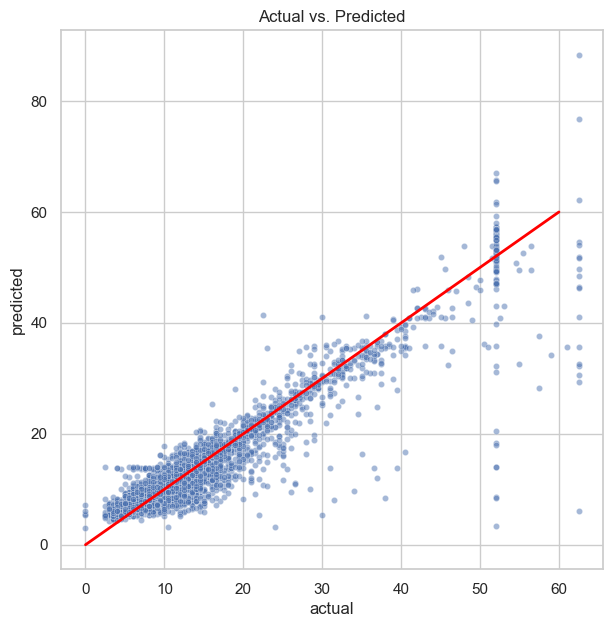

In [83]:
# Create a scatterplot to visualize `predicted` over `actual`
fig, ax = plt.subplots(figsize=(7, 7))
sns.set(style='whitegrid')
sns.scatterplot(x='actual',
                y='predicted',
                data=results,
                s=20,
                alpha=0.5,
                ax=ax
                )
plt.plot([0,60], [0,60], c='red', linewidth=2)
plt.title('Actual vs. Predicted')

#### Task 9b. (Multivariate) Normality Assumption

Text(0, 0.5, 'Count')

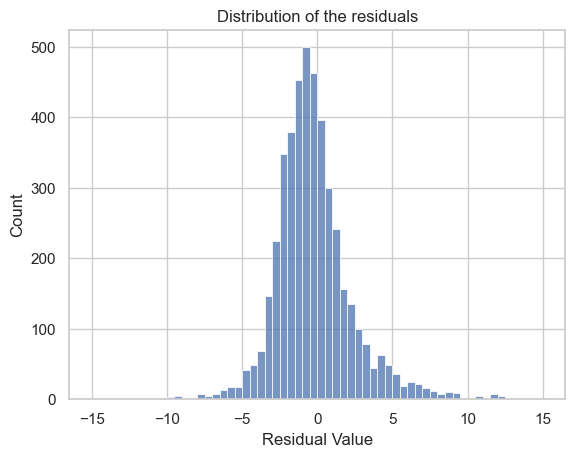

In [76]:
# Visualize the distribution of the `residuals` using a histogram or Q-Q plot
sns.histplot(results['residual'], bins=np.arange(-15,15.5,0.5))
plt.title('Distribution of the residuals')
plt.xlabel('Residual Value')
plt.ylabel('Count')

In [49]:
results['residual'].mean()

-0.015442621528681482

**Insight:** The distribution of the residuals is normal and has a mean of -0.015. This normal distribution around zero is good, as it demonstrates that the models errors are evenly distributed and unbiased.

#### Task 9c. Linearity Assumption

Text(0.5, 1.0, 'Scatterplot of residuals over predicted values')

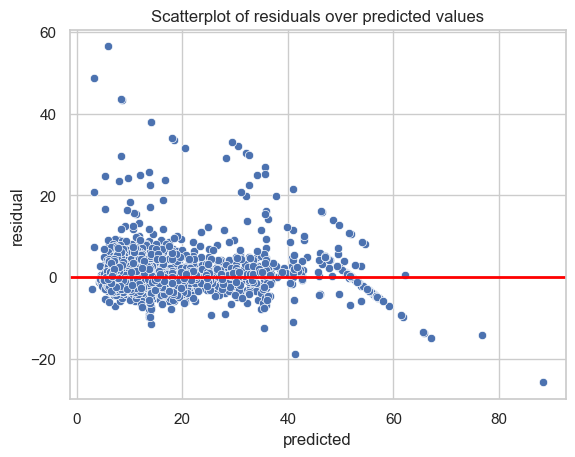

In [101]:
# Create a scatterplot of `residuals` over `predicted`
sns.scatterplot(x='predicted', 
                y='residual', 
                data=results, 
               )
plt.axhline(0, c='red', linewidth=2)
plt.title('Scatterplot of residuals over predicted values')

**Insight** 

-> The model's residuals are evenly distributed above and below zero, with the exception of the sloping lines from the upper-left corner to the lower-right corner, which they represent the imputed maximum of 62.50 dollars and the flat rate of 52 dollars for JFK airport trips.

In [102]:
# Get model coefficients in the order of the features that were used to train the model using the 'coef_' attribute
coefficients = pd.DataFrame(lr_model.coef_, columns=X.columns)
coefficients

,VendorID,passenger_count,mean_distance,mean_duration,rush_hour
0,-0.054376,0.030755,7.102335,2.806779,0.110278


**Insight** 

-> The coefficients reveal that `mean_distance` was the feature with the greatest weight in the model's final prediction. For every mile traveled, the fare amount increases by a mean of 7 dollars. 
-> However, because some highly correlated features were not removed, the confidence interval of this assessment is wider.

### Extra Work
    -> This work will be broken into the following steps:
        1. Get the model's predictions on the full dataset.
        2. Impute the constant fare rate of $52 for all trips with rate codes of `2`.
        3. Check the model's performance on the full dataset.
        4. Save the final predictions and `mean_duration` and `mean_distance` columns for downstream use.

#### 1. Predict on Full Dataset

In [103]:
y_preds_full = lr.predict(X_scaled)

#### 2. Impute Ratecode 2 Fare
    -> The data dictionary says that the `RatecodeID` column captures the following information:
        1 = standard rate
        2 = JFK (airport)
        3 = Newark (airport)
        4 = Nassau or Westchester
        5 = Negotiated fare
        6 = Group ride

    -> This means that some fares don't need to be predicted. They can simply be imputed based on their rate code.                    Specifically, all rate codes of `2` can be imputed with $52, as this is a flat rate for JFK airport.

In [104]:
# Create a new df containing just the RatecodeID col from the whole dataset
final_preds = df[['RatecodeID']].copy()

# Add a column containing all the predictions
final_preds['y_preds_full'] = y_preds_full

# Impute a prediction of 52 at all rows where RatecodeID == 2
final_preds.loc[final_preds['RatecodeID'] == 2, 'y_preds_full'] = 52

# Check that it worked
final_preds[final_preds['RatecodeID'] == 2].head()

,RatecodeID,y_preds_full
11,2,52.0
110,2,52.0
161,2,52.0
247,2,52.0
379,2,52.0


#### 3. Check Performance on Full Dataset

In [105]:
final_preds = final_preds['y_preds_full']
print('R^2:', r2_score(y, final_preds))
print('MAE:', mean_absolute_error(y, final_preds))
print('MSE:', mean_squared_error(y, final_preds))
print('RMSE:',np.sqrt(mean_squared_error(y, final_preds)))

R^2: 0.8910853978683976
MAE: 1.9925062522699732
MSE: 12.101575504689931
RMSE: 3.4787318816905004


#### 4. Save final predictions with `mean_duration` and `mean_distance` columns

In [106]:
# Combine means columns with predictions column
nyc_preds_means = df[['mean_duration', 'mean_distance']].copy()
nyc_preds_means['predicted_fare'] = final_preds

nyc_preds_means.head()

,mean_duration,mean_distance,predicted_fare
0,22.847222,3.521667,16.434245
1,24.470370,3.108889,16.052218
2,7.250000,0.881429,7.053706
3,30.250000,3.700000,18.731650
4,14.616667,4.435000,15.845642
